## 🧩 Этап 1. Анализ и очистка данных (Pandas)

### 1️⃣ Предварительный анализ
- Загрузите датасет и посмотрите первые 10 строк.
- Определите размер таблицы и типы данных.
- Проверьте количество уникальных значений в основных колонках.
- Найдите количество пропусков и процент пропущенных значений в каждом столбце.
- Удалите строки, где отсутствует `CustomerID` или `Description`.
- Удалите дубликаты.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
#1.1 Загрузите датасет и посмотрите первые 10 строк.

df = pd.read_csv('/Users/nikolajantonevic/Desktop/online_retail_II.csv')
#pd.set_option('display.max_columns', None)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [79]:
#1.2 Определите размер таблицы и типы данных.
df.shape

(1067371, 8)

In [80]:
df.size

8538968

In [81]:
#1.3 Проверьте количество уникальных значений в основных колонках.
lst = df.columns
lst.unique()

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [82]:
#1.4 Найдите количество пропусков и процент пропущенных значений в каждом столбце.
df.isna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1067366,False,False,False,False,False,False,False,False
1067367,False,False,False,False,False,False,False,False
1067368,False,False,False,False,False,False,False,False
1067369,False,False,False,False,False,False,False,False


In [83]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [84]:
df.isna().sum()/df.size

Invoice        0.000000
StockCode      0.000000
Description    0.000513
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.028459
Country        0.000000
dtype: float64

In [121]:
#1.5 Удалите строки, где отсутствует `CustomerID` или `Description`.
df = df.dropna(subset=['Customer ID', 'Description'])
df[['Customer ID', 'Description']].isna().sum()

Customer ID    0
Description    0
dtype: int64

In [87]:
#1.6 Удалите дубликаты строк, если они есть.
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [88]:
df.drop_duplicates()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### 2️⃣ Обогащение данных
- Создайте новый столбец `TotalPrice = Quantity * UnitPrice`.
- Создайте столбец `InvoiceMonth` = месяц из `InvoiceDate`.
- Создайте столбец `IsReturn` = 1, если `Quantity` < 0 (возврат товара), иначе 0.
- Найдите клиентов с наибольшей долей возвратов.

In [119]:
#2.1 Создайте новый столбец `TotalPrice = Quantity * UnitPrice`.
df['TotalPrice'] = df['Quantity'] * df['Price']
df[['Quantity', 'Price', 'TotalPrice']].head()

,Quantity,Price,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [ ]:
#2.2 Создайте столбец `InvoiceMonth` = месяц из `InvoiceDate`.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df[['InvoiceDate', 'InvoiceMonth']].head()
df.dtypes

In [ ]:
#2.3 Создайте столбец `IsReturn` = 1, если `Quantity` < 0 (возврат товара), иначе 0.
df['IsReturn'] = (df['Quantity'] < 0).astype(int) #false - 0, true - 1
df[['Quantity', 'IsReturn']].head(10)

,Quantity,IsReturn
0,12,0
1,12,0
2,12,0
3,48,0
4,24,0
5,24,0
6,24,0
7,10,0
8,12,0
9,12,0


In [120]:
#2.4 Найдите клиентов с наибольшей долей возвратов.
returns_by_customer = (
    df.groupby('Customer ID')['IsReturn']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_orders', 'sum': 'returns'})
)
# Доля возвратов
returns_by_customer['return_rate'] = returns_by_customer['returns'] / returns_by_customer['total_orders']
top_return_customers = returns_by_customer.sort_values(by='return_rate', ascending=False)
print(top_return_customers.head(10))

             total_orders  returns  return_rate
Customer ID                                    
13664.0                 1        1          1.0
13353.0                 3        3          1.0
13633.0                 1        1          1.0
13528.0                 1        1          1.0
16575.0                 1        1          1.0
16580.0                 2        2          1.0
13463.0                 1        1          1.0
13409.0                 1        1          1.0
13401.0                 1        1          1.0
13378.0                 1        1          1.0


### 3️⃣ Исследование продаж
- Найдите:
  - топ-10 популярных товаров.
  - топ-5 стран по количеству покупок и по выручке.
  - средний чек по странам.
  - среднее количество товаров на заказ.
- Найдите дни недели с максимальной и минимальной выручкой.
- Найдите среднюю выручку по каждому месяцу.

In [ ]:
#3.1 топ-10 популярных товаров.
top_10_products = (
    df.groupby('Description', as_index=False)   
    .agg(total_quantity=('Quantity', 'sum'))  
    .sort_values('total_quantity', ascending=False)  
    .head(10) 
)

print(top_10_products)

In [37]:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [105]:
#3.2 топ-5 стран по количеству покупок и по выручке.
top_5_country_Quantity = (
    df.groupby('Country', as_index=False) 
    .agg(total_quantity=('Quantity', 'sum'), 
        Total_revenue=('TotalPrice', 'sum'))  
    .sort_values('total_quantity', ascending=False)
    .head(5)  
)

print(top_5_country_Quantity)

           Country  total_quantity  Total_revenue
38  United Kingdom         8353502   1.380642e+07
24     Netherlands          381951   5.485249e+05
10            EIRE          313373   5.785016e+05
9          Denmark          235218   6.574109e+04
14         Germany          224581   4.179886e+05


In [110]:
top_5_country_revenue = (
    df.groupby('Country', as_index=False) 
    .agg(Total_revenue=('TotalPrice', 'sum'))  
    .sort_values('Total_revenue', ascending=False)
    .head(5)  
)

print(top_5_country_revenue)

           Country  Total_revenue
38  United Kingdom   1.380642e+07
10            EIRE   5.785016e+05
24     Netherlands   5.485249e+05
14         Germany   4.179886e+05
13          France   3.265047e+05


In [112]:
#3.3 средний чек по странам.
avg_revenue_country = (
    df.groupby('Country', as_index=False)
    .agg(total_revenue=('TotalPrice', 'sum'),
        total_quantity=('Quantity', 'sum'))
)

avg_revenue_country['avg_revenue'] = avg_revenue_country['total_revenue'] / avg_revenue_country['total_quantity']

avg_revenue_country = avg_revenue_country.sort_values('avg_revenue', ascending=False)

print(avg_revenue_country.head(5))

               Country  total_revenue  total_quantity  avg_revenue
21             Lebanon        1693.88             386     4.388290
11  European Community        1291.75             497     2.599095
4               Brazil        1411.87             545     2.590587
15              Greece       18995.49            7707     2.464706
7               Cyprus       24162.74           10688     2.260735


In [ ]:
avg_revenue_country2 = (
    df.groupby('Country', as_index=False)
    .agg(total_quantity=('Quantity', 'sum'),
        total_revenue=('TotalPrice', 'sum'))
)

avg_revenue_country2['avg_revenue'] = avg_revenue_country2['total_revenue'] / avg_revenue_country2['total_quantity']
avg_revenue_country2 = avg_revenue_country2.sort_values('total_revenue', ascending=False).head(5)

print(avg_revenue_country2)

           Country  total_quantity  total_revenue  avg_revenue
38  United Kingdom         8353502   1.380642e+07     1.652771
10            EIRE          313373   5.785016e+05     1.846048
24     Netherlands          381951   5.485249e+05     1.436113
14         Germany          224581   4.179886e+05     1.861193
13          France          183339   3.265047e+05     1.780880


In [ ]:
#3.4 среднее количество товаров на заказ.
avg_revenue_country3 = (
    df.groupby('Country', as_index=False)
    .agg(total_quantity=('Quantity', 'sum'),
        total_orders=('Invoice', 'nunique'))
)

avg_revenue_country3['avg_Description_per_quantity'] = avg_revenue_country3['total_quantity'] / avg_revenue_country3['total_orders']
avg_revenue_country3 = avg_revenue_country3.sort_values('avg_Description_per_quantity', ascending=False).head(5)

print(avg_revenue_country3)

        Country  total_quantity  total_orders  avg_Description_per_quantity
9       Denmark          235218            53                   4438.075472
24  Netherlands          381951           250                   1527.804000
35     Thailand            2552             2                   1276.000000
0     Australia          103706           117                    886.376068
33       Sweden           87737           128                    685.445312


In [129]:
avg_items_per_order = (
    df.groupby(['Country', 'Invoice'], as_index=False)
    .agg(total_quantity=('Quantity', 'sum'))
    .groupby('Country', as_index=False)
    .agg(avg_items_per_order=('total_quantity', 'mean'))
    .sort_values('avg_items_per_order', ascending=False)
)

print(avg_items_per_order.head(5))

        Country  avg_items_per_order
9       Denmark          4438.075472
24  Netherlands          1527.804000
35     Thailand          1276.000000
0     Australia           886.376068
33       Sweden           685.445312


In [142]:
#3.5 Найдите дни недели с максимальной и минимальной выручкой.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M') 

revenue_by_weekday = (
    df.groupby('Weekday', as_index=False)
    .agg(total_revenue=('TotalPrice', 'sum'))
)

max_day = revenue_by_weekday.loc[revenue_by_weekday['total_revenue'].idxmax()]
min_day = revenue_by_weekday.loc[revenue_by_weekday['total_revenue'].idxmin()]

print("День недели с максимальной выручкой:", max_day['Weekday'], "—", max_day['total_revenue'])
print("День недели с минимальной выручкой:", min_day['Weekday'], "—", min_day['total_revenue'])


День недели с максимальной выручкой: Thursday — 3617612.492
День недели с минимальной выручкой: Saturday — 9803.05


In [ ]:
#3.6 Найдите среднюю выручку по каждому месяцу.
avg_revenue_yearmount = (
    df.groupby('YearMonth', as_index=False)
    .agg(avg_revenue=('TotalPrice', 'sum'))
#   .sort_values('avg_revenue', ascending=False)
)
print (avg_revenue_yearmount)

   YearMonth  avg_revenue
0    2009-12   663272.050
1    2010-01   531952.902
2    2010-02   489399.586
3    2010-03   635996.481
4    2010-04   560635.022
5    2010-05   559924.550
6    2010-06   571459.910
7    2010-07   562785.900
8    2010-08   587256.460
9    2010-09   781033.301
10   2010-10   964989.780
11   2010-11  1134879.282
12   2010-12   859227.370
13   2011-01   475074.380
14   2011-02   436546.150
15   2011-03   579964.610
16   2011-04   426047.851
17   2011-05   648251.080
18   2011-06   608013.160
19   2011-07   574238.481
20   2011-08   616368.000
21   2011-09   931440.372
22   2011-10   974603.590
23   2011-11  1132407.740
24   2011-12   342524.380


### 4️⃣ Визуализация (Matplotlib / Seaborn / Plotly)
- Постройте гистограмму распределения `UnitPrice` и `TotalPrice`.
- Постройте boxplot для выручки (`TotalPrice`) по странам.
- Нарисуйте топ-10 товаров по количеству продаж.
- Визуализируйте выручку по месяцам.
- Постройте heatmap корреляции между числовыми признаками.
- Постройте pie chart распределения заказов по странам.
- Нарисуйте scatterplot зависимости `Quantity` и `TotalPrice`.

In [137]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,IsReturn,Year,Month,Day,Weekday,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,0,2009,12,1,Tuesday,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,0,2009,12,1,Tuesday,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,0,2009,12,1,Tuesday,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,0,2009,12,1,Tuesday,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,0,2011,12,9,Friday,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,0,2011,12,9,Friday,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,0,2011,12,9,Friday,2011-12


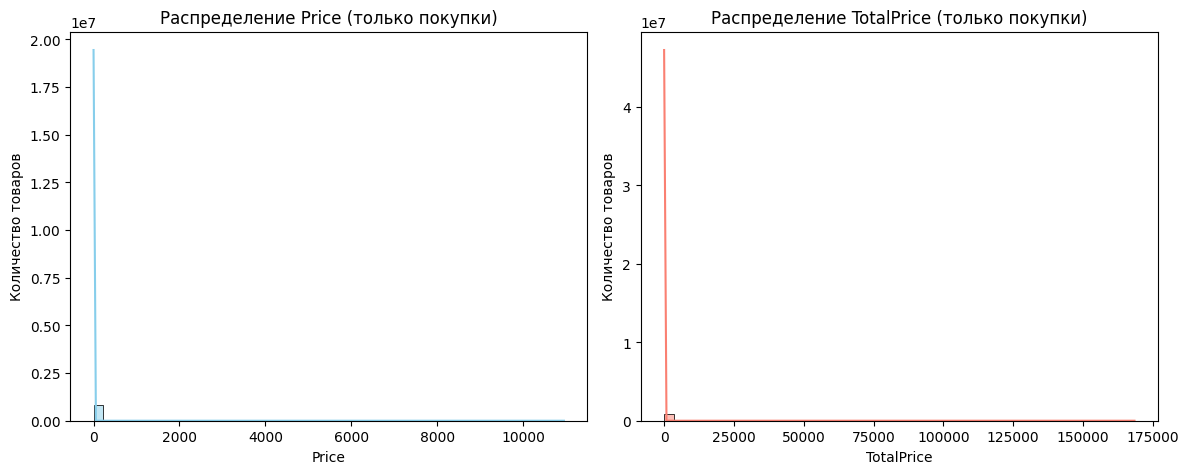

In [ ]:
#4.1 Постройте гистограмму распределения `Price` и `TotalPrice`.
df_positive = df[df['Quantity'] > 0]
plt.figure(figsize=(12,5))

# Price
plt.subplot(1,2,1)
sns.histplot(df_positive['Price'], bins=50, kde=True, color='skyblue')
plt.title('Распределение Price (только покупки)')
plt.xlabel('Price')
plt.ylabel('Количество товаров')

# TotalPrice
plt.subplot(1,2,2)
sns.histplot(df_positive['TotalPrice'], bins=50, kde=True, color='salmon')
plt.title('Распределение TotalPrice (только покупки)')
plt.xlabel('TotalPrice')
plt.ylabel('Количество товаров')

plt.tight_layout()
plt.show()

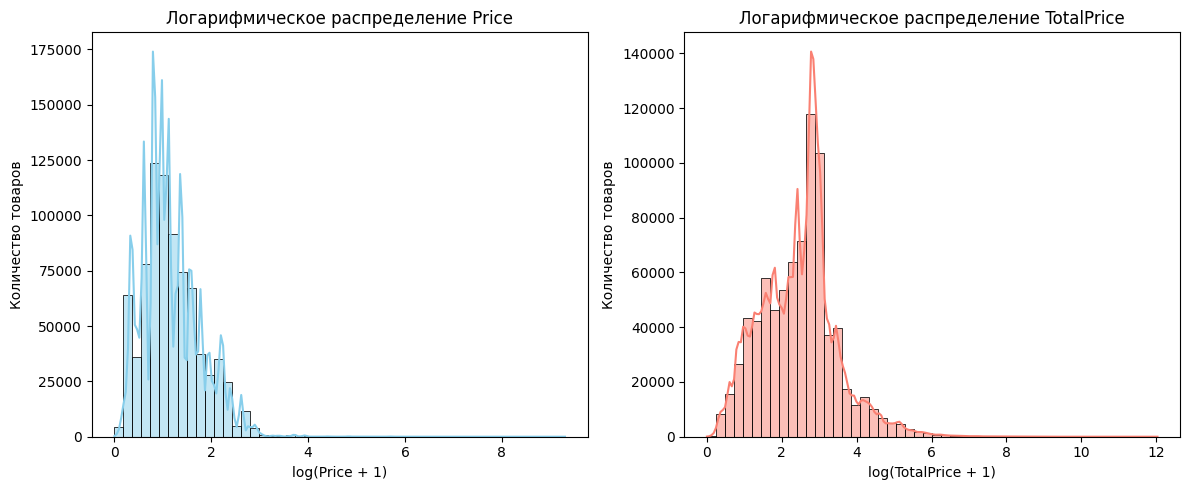

In [ ]:
#4.1 Постройте гистограмму распределения `Price` и `TotalPrice`.
df_positive = df[(df['Quantity'] > 0) & (df['Price'] > 0) & (df['TotalPrice'] > 0)]
plt.figure(figsize=(12,5))

# Price
plt.subplot(1,2,1)
sns.histplot(np.log1p(df_positive['Price']), bins=50, kde=True, color='skyblue')
plt.title('Логарифмическое распределение Price')
plt.xlabel('log(Price + 1)')
plt.ylabel('Количество товаров')

# TotalPrice
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_positive['TotalPrice']), bins=50, kde=True, color='salmon')
plt.title('Логарифмическое распределение TotalPrice')
plt.xlabel('log(TotalPrice + 1)')
plt.ylabel('Количество товаров')

plt.tight_layout()
plt.show()

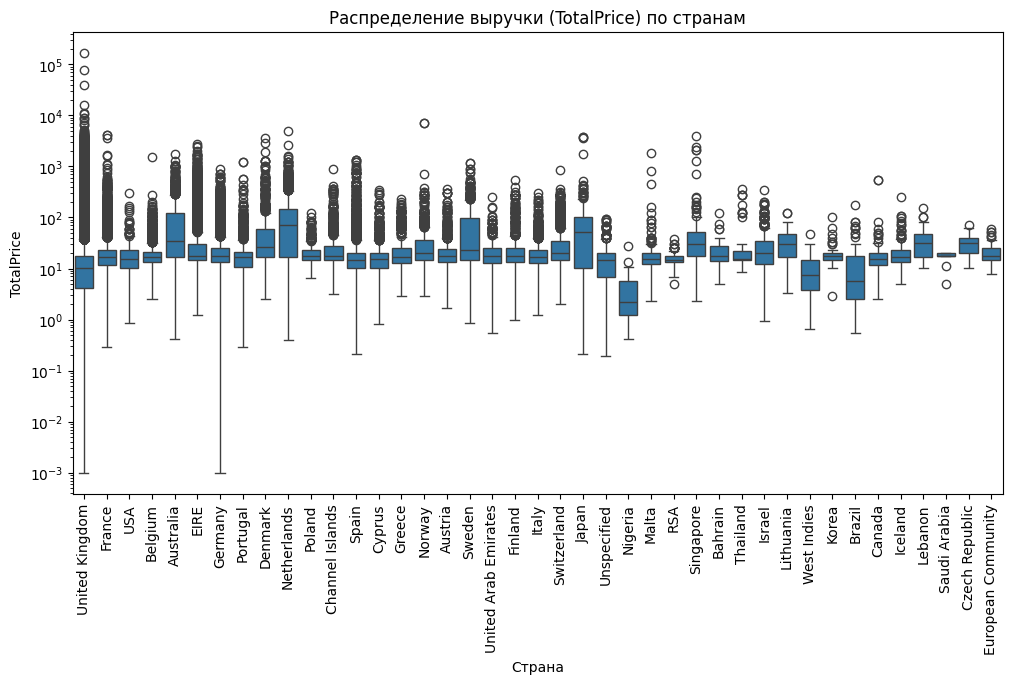

In [167]:
#4.2 Постройте boxplot для выручки (`TotalPrice`) по странам.
df_positive = df[df['TotalPrice'] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='TotalPrice', data=df_positive)
plt.title('Распределение выручки (TotalPrice) по странам')
plt.xlabel('Страна')
plt.ylabel('TotalPrice')
plt.xticks(rotation=90)  # поворачиваем подписи стран для удобства
plt.yscale('log')  # логарифмическая шкала, чтобы выбросы не сжимали график
plt.show()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_90656/1824854840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantity', y='Description', data=top_10_products, palette='viridis')


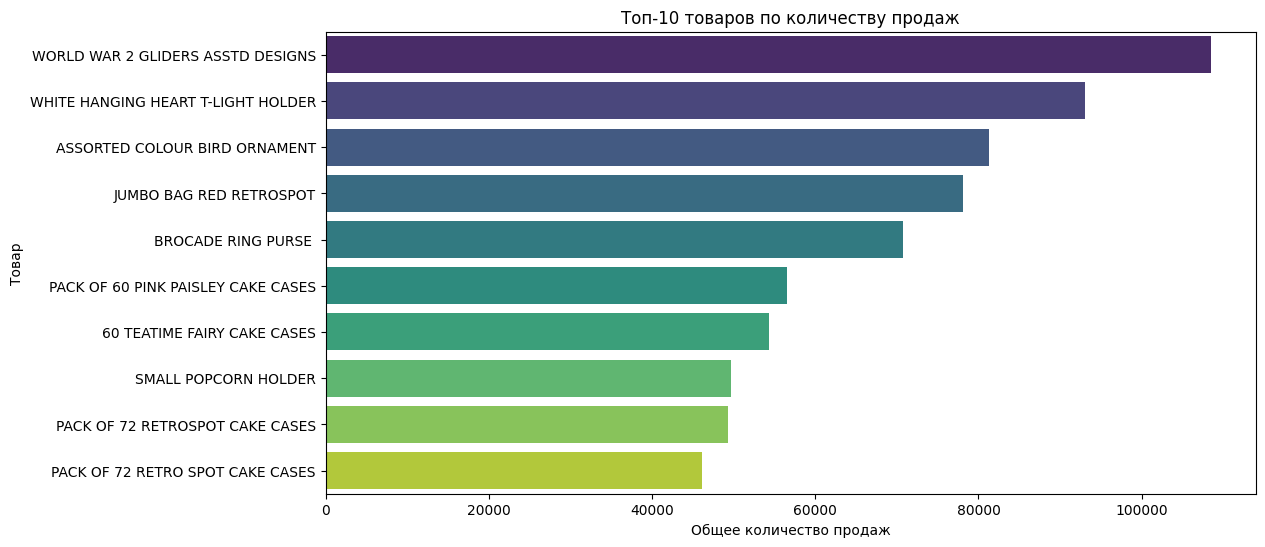

In [155]:
#4.3 Нарисуйте топ-10 товаров по количеству продаж.
plt.figure(figsize=(12,6))
sns.barplot(x='total_quantity', y='Description', data=top_10_products, palette='viridis')
plt.title('Топ-10 товаров по количеству продаж')
plt.xlabel('Общее количество продаж')
plt.ylabel('Товар')
plt.show()

/var/folders/qb/b0r4rdkj7qj_s3s775rt_f1h0000gn/T/ipykernel_90656/2552797958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearMonth', y='avg_revenue', data=avg_revenue_yearmount, palette='viridis')


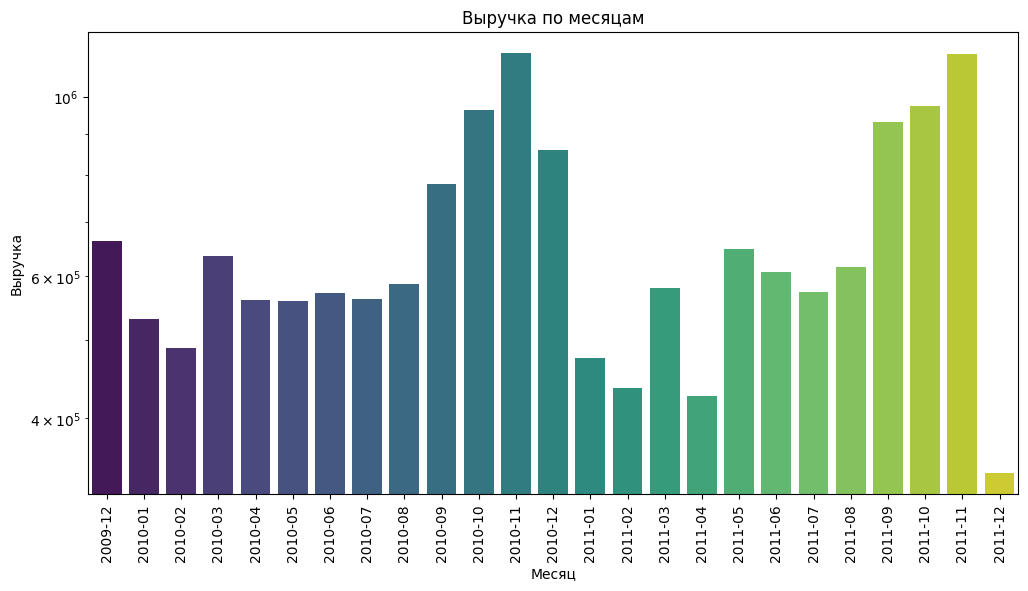

In [163]:
#4.4 Визуализируйте выручку по месяцам.
plt.figure(figsize=(12,6))
sns.barplot(x='YearMonth', y='avg_revenue', data=avg_revenue_yearmount, palette='viridis')
plt.yscale('log')
plt.title('Выручка по месяцам')
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.xticks(rotation=90) 
plt.show()

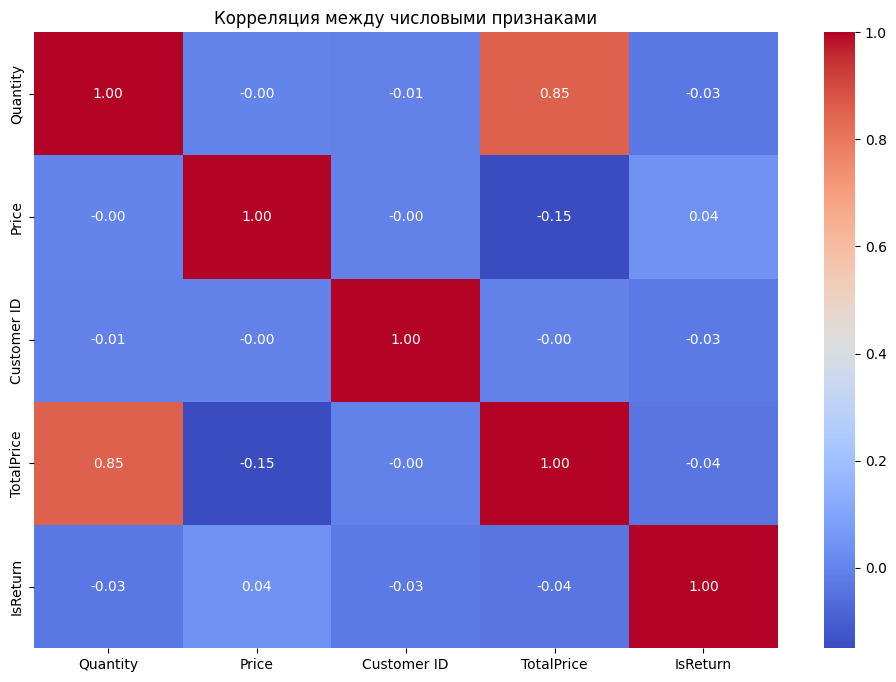

In [165]:
#4.5 Постройте heatmap корреляции между числовыми признаками.
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между числовыми признаками')
plt.show()

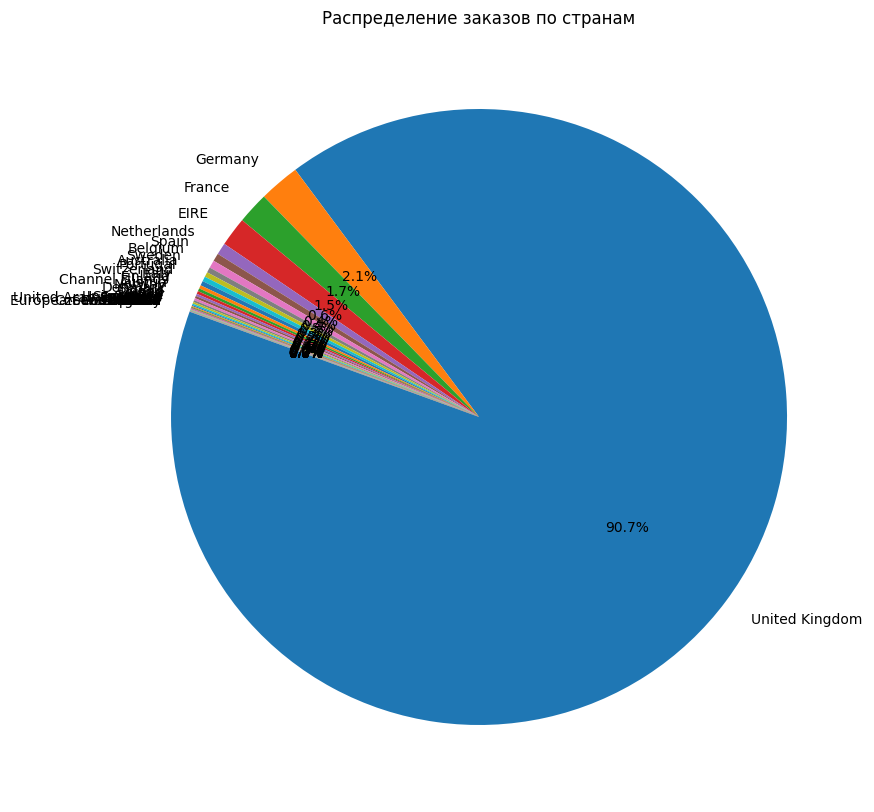

In [173]:
#4.6 Постройте pie chart распределения заказов по странам.
orders_by_country = df_positive.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.pie(orders_by_country, labels=orders_by_country.index, autopct='%1.1f%%', startangle=160)
plt.title('Распределение заказов по странам')
plt.show()

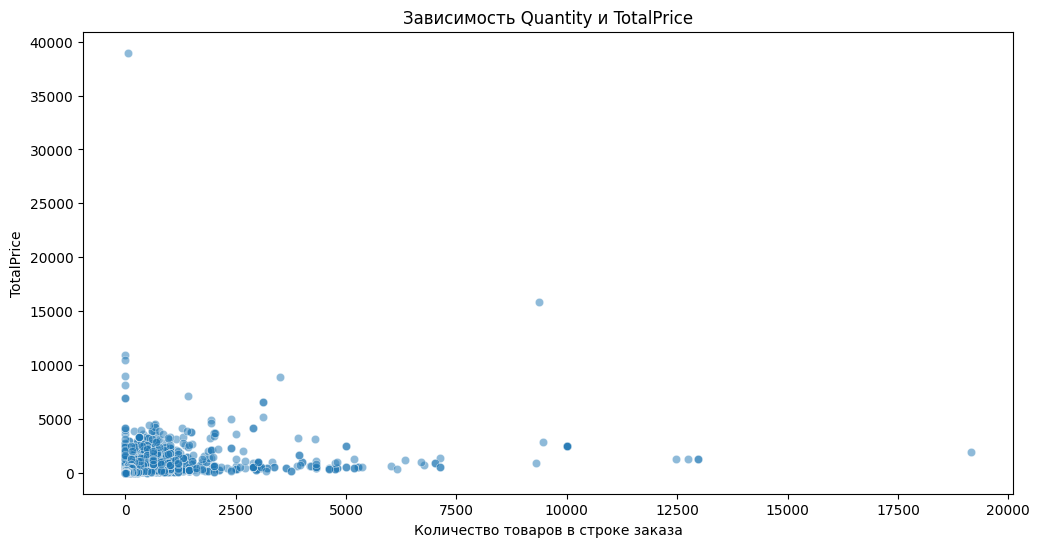

In [176]:
#4.7 Нарисуйте scatterplot зависимости `Quantity` и `TotalPrice`.
df_filtered = df_positive[(df_positive['Quantity'] <= 20000) & (df_positive['TotalPrice'] <= 50000)]
plt.figure(figsize=(12,6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df_filtered, alpha=0.5)
plt.title('Зависимость Quantity и TotalPrice')
plt.xlabel('Количество товаров в строке заказа')
plt.ylabel('TotalPrice')
plt.show()